202008 Have new reference files for v727car to play with

In [47]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
import os
import glob
from astropy.table import Table
from astropy.io import ascii
import astropy.units as u
import astropy.constants as const
import scipy.interpolate as interpolate
from astropy.convolution import convolve, Box1DKernel

#matplotlib set up
%matplotlib inline
from matplotlib import rcParams
rcParams["figure.figsize"] = (14, 5)
rcParams["font.size"] = 20

In [2]:
import stistools
import stisblazefix

The following tasks in the stistools package can be run with TEAL:
   basic2d      calstis     ocrreject     wavecal        x1d          x2d


/home/david/anaconda3/envs/astroconda/lib/python3.6/site-packages/stsci/tools/nmpfit.py:10: UserWarning: NMPFIT is deprecated - stsci.tools v 3.5 is the last version to contain it.
  warnings.warn("NMPFIT is deprecated - stsci.tools v 3.5 is the last version to contain it.")
/home/david/anaconda3/envs/astroconda/lib/python3.6/site-packages/stsci/tools/gfit.py:20: UserWarning: GFIT is deprecated - stsci.tools v 3.4.12 is the last version to contain it.Use astropy.modeling instead.
  warnings.warn("GFIT is deprecated - stsci.tools v 3.4.12 is the last version to contain it."


In [3]:
path = '/media/david/5tb_storage1/stis_recals/v727car/'
dpath = '{}data/'.format(path)
opath = '{}output/'.format(path)
refpath = '{}tm_files/'.format(path)

In [4]:
os.environ['oref'] = dpath

In [5]:
fltfile = glob.glob(dpath+'*flt.fits')
fltfile

['/media/david/5tb_storage1/stis_recals/v727car/data/odlc02010_flt.fits',
 '/media/david/5tb_storage1/stis_recals/v727car/data/odlc02010_new_flt.fits']

In [6]:
newrefs = os.listdir(refpath)
newrefs

['new_phottab_15381_2019-11-13_newtime_slope_mask129_lt90.fits',
 'riptab_iter2_13nov2019.fits']

In [7]:
hdul = fits.open(fltfile[0])

In [8]:
#hdul[0].header

Need to update the "PHOTTAB" and "RIPTAB" files with the new ones

In [9]:
"""print(hdul[0].header['PHOTTAB'])
print(hdul[0].header['RIPTAB'])

hdul[0].header['PHOTTAB'] = 'oref${}'.format(newrefs[0])
hdul[0].header['RIPTAB'] = 'oref${}'.format(newrefs[1])

print(hdul[0].header['PHOTTAB'])
print(hdul[0].header['RIPTAB'])

hdul.writeto(dpath+'odlc02010_new_flt.fits', overwrite= True)
hdul.close()"""

"print(hdul[0].header['PHOTTAB'])\nprint(hdul[0].header['RIPTAB'])\n\nhdul[0].header['PHOTTAB'] = 'oref${}'.format(newrefs[0])\nhdul[0].header['RIPTAB'] = 'oref${}'.format(newrefs[1])\n\nprint(hdul[0].header['PHOTTAB'])\nprint(hdul[0].header['RIPTAB'])\n\nhdul.writeto(dpath+'odlc02010_new_flt.fits', overwrite= True)\nhdul.close()"

Check it's worked...

In [10]:
newflt = dpath+'odlc02010_new_flt.fits'
hdul = fits.open(newflt)
print(hdul[0].header['PHOTTAB'])
print(hdul[0].header['RIPTAB'])
hdul.close()

oref$new_phottab_15381_2019-11-13_newtime_slope_mask129_lt90.fits
oref$riptab_iter2_13nov2019.fits


Try rextracting...

In [11]:
#stistools.x1d.x1d(newflt, output="v727car_test_x1d.fits", verbose=True, trailer="v727car_test.trl")

In [12]:
#fits.getheader(newflt)

In [13]:
data = fits.getdata('v727car_test_x1d.fits',1)
oldx = glob.glob(dpath+'*x1d.fits')[0]

odata = fits.getdata(oldx, 1)

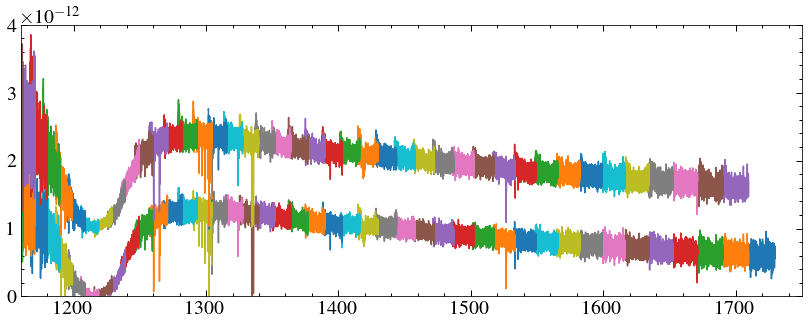

In [14]:
for dt in data:
    plt.plot(dt['WAVELENGTH'][5:-6], dt['FLUX'][5:-6])
plt.xlim(1160, 1750)
plt.ylim(0, 4e-12)

for dt in odata:
    plt.plot(dt['WAVELENGTH'][5:-6], dt['FLUX'][5:-6]+1e-12)

An improvement! Let's see if stisblazefix makes it any better

In [15]:
#rcParams['axes.unicode_minus'] = False
stisblazefix.fluxfix(['v727car_test_x1d.fits'], 'v727car_test.pdf')

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


[{'pixshift': array([-0.29977929, -0.38122924, -0.46267919, -0.54412915, -0.6255791 ,
         -0.70702905, -0.788479  , -0.86992895, -0.95137891, -1.03282886,
         -1.11427881, -1.19572876, -1.27717871, -1.35862866, -1.44007862,
         -1.52152857, -1.60297852, -1.68442847, -1.76587842, -1.84732838,
         -1.92877833, -2.01022828, -2.09167823, -2.17312818, -2.25457814,
         -2.33602809, -2.41747804, -2.49892799, -2.58037794, -2.6618279 ,
         -2.74327785, -2.8247278 , -2.90617775, -2.9876277 , -3.06907765,
         -3.15052761, -3.23197756, -3.31342751, -3.39487746, -3.47632741,
         -3.55777737, -3.63922732, -3.72067727, -3.80212722]),
  'acof': -0.29977929018194355,
  'bcof': -0.0814499518927249,
  'acoferr': 1.5585191963909182,
  'bcoferr': 0.06135718954557255,
  'oldresids': array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.15167588,  0.02354378, -0.01675229, -0.03004409,
         -0.04224714, -0.01635334, -0.0238

(0.0, 2e-12)

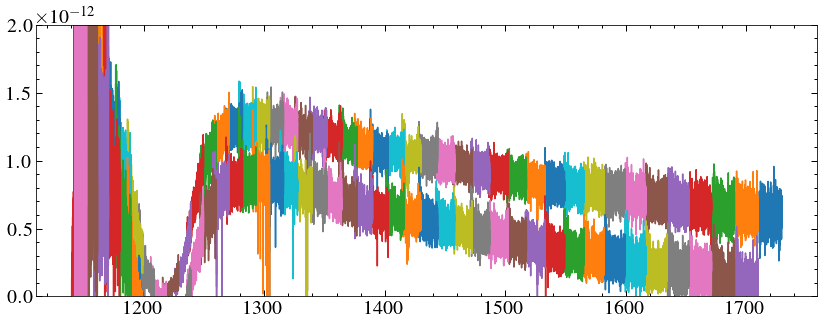

In [35]:
ndata = fits.getdata('v727car_test_x1f.fits')
for dt in ndata:
    plt.plot(dt['WAVELENGTH'][5:-6], dt['FLUX'][5:-6])
for dt in odata:
    plt.plot(dt['WAVELENGTH'][5:-6], dt['FLUX'][5:-6]-0.5e-12)
#plt.xlim(1170, 1270)
plt.ylim(0, 2e-12)


Now to add it all together

In [36]:
def spectra_adder(f_array, e_array):
    """
    Returns a variance-weighted coadd with standard error of the weighted mean (variance weights, scale corrected).
    f_array and e_arrays are collections of flux and error arrays, which should have the same lenth and wavelength scale
    """
    weights = 1 / (e_array**2)
    flux = np.average(f_array, axis =0, weights = weights)
    var = 1 / np.sum(weights, axis=0)
    rcs = np.sum((((flux - f_array)**2) * weights), axis=0) / (len(f_array)-1) #reduced chi-squared
    error = (var * rcs)**0.5
    #var1 = 
    return flux, var**0.5

def echelle_coadd(wavelength, flux, err, nclip =5):
    """
    combines echelle orders into one spectrum, stiching them together at the overlap 
    """
    #slice dodgy ends off orders (usually 5-10 for stis el40m)
    wavelength = wavelength[:, nclip:-(nclip+1)]
    flux = flux[:, nclip:-(nclip+1)]
    err = err[:, nclip:-(nclip+1)]
    
    #new arrays to put the output in
    w_full = np.array([], dtype=float)
    f_full = np.array([], dtype=float)
    e_full = np.array([], dtype=float)   

    shape = np.shape(flux)
    order = 0
    while order < (shape[0]):
        
        #first add the part that does not overlap ajacent orders to the final spectrum
        if order == 0: #first and last orders do not overlap at both ends
            overmask = (wavelength[order] > wavelength[order + 1][-1])
        elif order == shape[0]-1:
            overmask = (wavelength[order] < wavelength[order - 1][1])
        else:
            overmask = (wavelength[order] > wavelength[order + 1][-1]) & (wavelength[order] < wavelength[order - 1][1])
        w_full = np.concatenate((w_full, wavelength[order][overmask]))
        f_full = np.concatenate((f_full, flux[order][overmask]))
        e_full = np.concatenate((e_full, err[order][overmask]))
  
        if order != shape[0]-1:
            
            #interpolate each order onto the one beneath it, with larger wavelength bins. Code adapted from stisblazefix
            f = interpolate.interp1d(wavelength[order + 1], flux[order + 1], fill_value='extrapolate')
            g = interpolate.interp1d(wavelength[order + 1], err[order + 1], fill_value='extrapolate')
            overlap = np.where(wavelength[order] <= wavelength[order + 1][-1])
            f0 = flux[order][overlap]
            f1 = f(wavelength[order][overlap])
            g0 = err[order][overlap]
            g1 = g(wavelength[order][overlap])
       
             
            #combine flux and error at overlap and add to final spectrum
            w_av = wavelength[order][overlap]
            f_av, e_av = spectra_adder(np.array([f0,f1]),np.array([g0,g1]))
            w_full = np.concatenate((w_full, w_av))
            f_full = np.concatenate((f_full, f_av))
            e_full = np.concatenate((e_full, e_av))
        order += 1
    
    #stis orders are saved in reverse order, so combined spectra are sorted by the wavelength array
    arr1inds = w_full.argsort()
    sorted_w = w_full[arr1inds]
    sorted_f = f_full[arr1inds]
    sorted_e = e_full[arr1inds]
 
    
    return sorted_w, sorted_f, sorted_e

In [42]:
w, f, e = echelle_coadd(ndata['WAVELENGTH'], ndata['FLUX'], ndata['ERROR'])

(0.0, 2e-12)

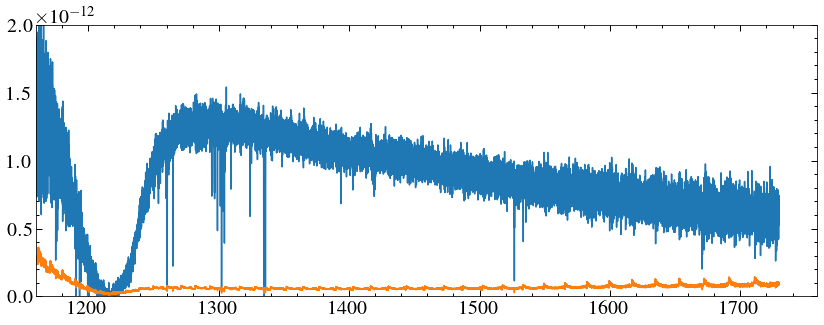

In [43]:
plt.plot(w,f)
plt.plot(w, e)
plt.xlim(1160)
plt.ylim(0, 2e-12)

In [44]:
ow, of, oe = echelle_coadd(odata['WAVELENGTH'], odata['FLUX'], odata['ERROR'])

(0.0, 2e-12)

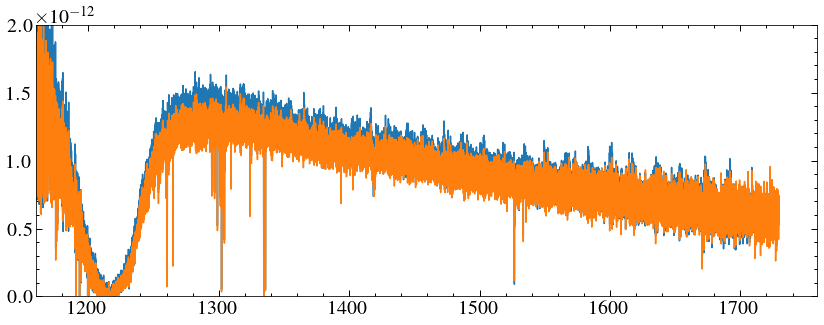

In [46]:
plt.plot(ow, of)
plt.plot(w,f)
plt.xlim(1160)
plt.ylim(0, 2e-12)

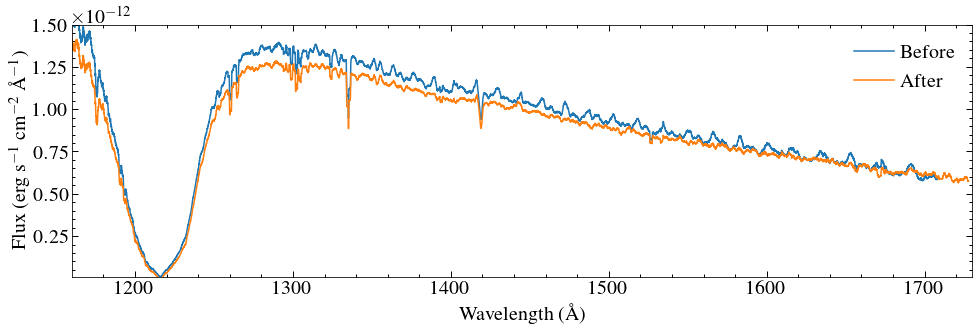

In [63]:
smooth = 100
f1 = convolve(f,Box1DKernel(smooth))
of1 = convolve(of,Box1DKernel(smooth))
plt.plot(ow[:-99], of1[:-99], label ='Before')
plt.plot(w[:-99],f1[:-99], label='After')

plt.xlim(1160, 1730)
plt.ylim(0.01e-12, 1.5e-12)
plt.legend()

plt.xlabel('Wavelength (\AA)')
plt.ylabel('Flux (erg s$^{-1}$ cm$^{-2}$ \AA$^{-1}$)')
plt.tight_layout()
plt.savefig('v727car_test.pdf')

In [64]:
savdat = Table([w, f, e], names=['#WAVELENGTH', 'FLUX', 'ERROR'])
ascii.write(savdat, 'v727car_test.dat', format='basic', overwrite=True)

array([-8.6630174e-12, -1.8714711e-12, -1.8694487e-13, ...,
        1.6975633e-12,  2.7366258e-12, -2.8732119e-13], dtype=float32)